<a href="https://colab.research.google.com/github/christopher-christain/Data-science--learning/blob/main/practice_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Install required packages
!pip install pandas numpy
!pip install lxml

In [19]:
import numpy as np
import pandas as pd

# You can also use this section to suppress warnings generated by your code:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn
warnings.filterwarnings('ignore')

In [20]:
URL="https://web.archive.org/web/20230902185326/https://en.wikipedia.org/wiki/List_of_countries_by_GDP_%28nominal%29"

In [25]:
# Extract tables from webpage using Pandas. Retain table number 3 as the required dataframe.
tables = pd.read_html(URL)
df = tables[3]

# Replace the column headers with column numbers
df.columns = range(df.shape[1])

# Retain columns with index 0 and 2 (name of country and value of GDP quoted by IMF)
df = df[[0, 2]]

# Retain the Rows with index 1 to 10, indicating the top 10 economies of the world.
df = df[1:11]

# Assign column names as "Country" and "GDP (Million USD)"

df.columns = ["Country", "GDP (Million USD)"]

In [26]:
# Change the data type of the 'GDP (Million USD)' column to integer. Use astype() method.
df["GDP (Million USD)"] = df["GDP (Million USD)"].astype(int)


# Convert the GDP value in Million USD to Billion USD
df["GDP (Billion USD)"] = df["GDP (Million USD)"].astype(int) / 1000

df = df.drop(columns=["GDP (Million USD)"])

# Use numpy.round() method to round the value to 2 decimal places.
df["GDP (Billion USD)"] = df["GDP (Billion USD)"].round(2)


# Rename the column header from 'GDP (Million USD)' to 'GDP (Billion USD)'
df = df.rename(columns={"GDP (Million USD)": "GDP (Billion USD)"})
df

,Country,GDP (Billion USD)
1,United States,26854.60
2,China,19373.59
3,Japan,4409.74
4,Germany,4308.85
5,India,3736.88
6,United Kingdom,3158.94
7,France,2923.49
8,Italy,2169.74
9,Canada,2089.67
10,Brazil,2081.24


from matplotlib import pyplot as plt
df['GDP (Billion USD)'].plot(kind='hist', bins=20, title='GDP (Billion USD)')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df['GDP (Billion USD)'].plot(kind='line', figsize=(8, 4), title='GDP (Billion USD)')
plt.gca().spines[['top', 'right']].set_visible(False)

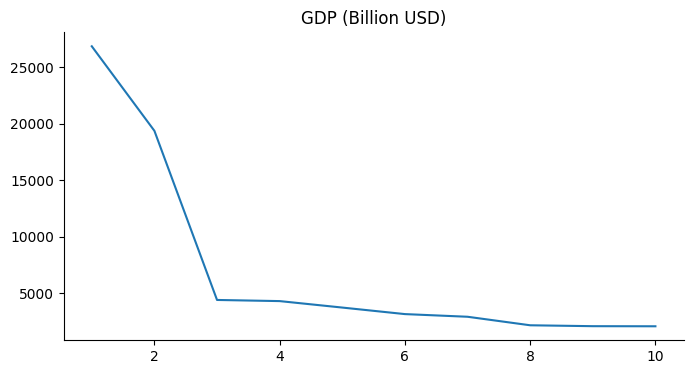

In [28]:
from matplotlib import pyplot as plt
df['GDP (Billion USD)'].plot(kind='line', figsize=(8, 4), title='GDP (Billion USD)')
plt.gca().spines[['top', 'right']].set_visible(False)

In [29]:
df.to_csv("Largest_economies.csv", index=False)